In [2]:
import bathy_smoother

lpsolve55.so not found.
Linear programming method will not be available.


Iteration # 1
current r= 0.149840843864   nbPointMod= 928 
 
Iteration # 2
current r= 0.153457051561   nbPointMod= 636 
 
Iteration # 3
current r= 0.150863404877   nbPointMod= 541 
 
Iteration # 4
current r= 0.146372266826   nbPointMod= 486 
 
Iteration # 5
current r= 0.145776983139   nbPointMod= 432 
 
Iteration # 6
current r= 0.146713962635   nbPointMod= 386 
 
Iteration # 7
current r= 0.145558519891   nbPointMod= 364 
 
Iteration # 8
current r= 0.145981547509   nbPointMod= 331 
 
Iteration # 9
current r= 0.146907211451   nbPointMod= 309 
 
Iteration # 10
current r= 0.148142477926   nbPointMod= 274 
 
Iteration # 11
current r= 0.149454260437   nbPointMod= 247 
 
Iteration # 12
current r= 0.149025439503   nbPointMod= 224 
 
Iteration # 13
current r= 0.149710000089   nbPointMod= 222 
 
Iteration # 14
current r= 0.150388305882   nbPointMod= 212 
 
Iteration # 15
current r= 0.149312763408   nbPointMod= 194 
 
Iteration # 16
current r= 0.149609031962   nbPointMod= 198 
 
Iteration # 17
cu

'\nfor i in range(2):\n    ax[i].set_xlim(100,120)\n    ax[i].set_ylim(100,130)'

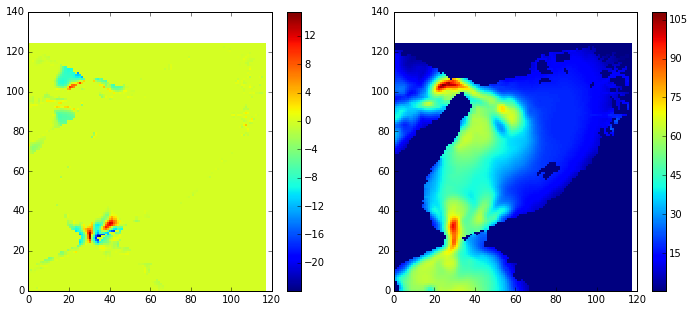

In [3]:
%matplotlib inline

import numpy as np
import netCDF4
import matplotlib.pyplot as plt

rx0max = 0.10

inpfile = '/home/okada/Dropbox/Data/ob500_grd-9.nc'
outfile = '/home/okada/Dropbox/Data/ob500_grd-10.nc'

inp = netCDF4.Dataset(inpfile, 'r')
mask = inp.variables['mask_rho'][:,:]
h = inp.variables['h'][:,:]
h2 = bathy_smoother.bathy_smoothing.smoothing_Laplacian_rx0(mask, h, rx0max) 

fig, ax = plt.subplots(1, 2, figsize=[12,5])
pc0 = ax[0].pcolor(h-h2)#, vmin=1, vmax=2)
pc1 = ax[1].pcolor(h2)#, vmin=1, vmax=2)
plt.colorbar(pc0, ax=ax[0])
plt.colorbar(pc1, ax=ax[1])
"""
for i in range(2):
    ax[i].set_xlim(100,120)
    ax[i].set_ylim(100,130)"""

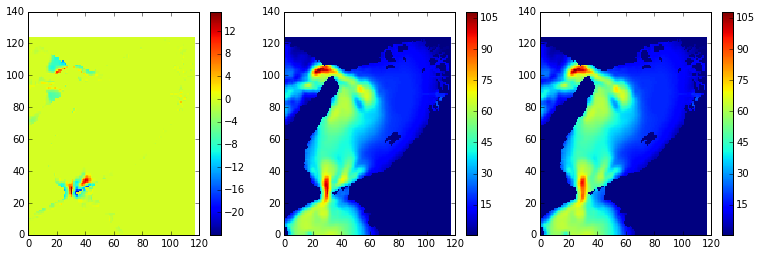

In [5]:
fig, ax = plt.subplots(1, 3, figsize=[13,4])
pc0 = ax[0].pcolor(h-h2)#, vmin=1, vmax=2)
pc1 = ax[1].pcolor(h)#, vmin=1, vmax=2)
pc2 = ax[2].pcolor(h2)#, vmin=1, vmax=2)
plt.colorbar(pc0, ax=ax[0])
plt.colorbar(pc1, ax=ax[1])
plt.colorbar(pc2, ax=ax[2])

for i in range(3):
    ax[i].set_xlim(0,120)
    ax[i].set_ylim(0,140)

In [6]:
import shutil

shutil.copyfile(inpfile, outfile)
out = netCDF4.Dataset(outfile, 'r+')
out.variables['h'][:,:] = h2
out.close()